# Plotting multiple scenarios

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import csv
import os
import random

import Postprocessing_baseCase


c:\Users\bst3191\anaconda3\envs\geospatial_environment\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
def list_subfolders(general_path):
    return [name for name in os.listdir(general_path) if os.path.isdir(os.path.join(general_path, name)) ]

In [4]:
def filter_list (lst,search_string):
    "this function filters a list and returns list only containing strings that contain search string"
    lst = list(filter(lambda k: search_string in k, lst))
    return lst

First set cases you want to compare

In [5]:
# select cases
#CaseNames=[ "GER_no_clay","GER_no_CCS", "GER_w_trunklines_only_1_strg", "GER"] #"GER_no_biomass",
#CaseNames = ["UK_no_clay_no_biomass","UK_no_clay_no_CCS", "UK_no_clay_w_trunklines","UK_no_clay",] #"UK", "UK_w_trunklines", "UK_no_biomass", "UK_no_CCS", ,
#CaseNames = ["SP_PT__no_clay_no_CCS","SP_PT_no_clay"]
#CaseNames= ["GER_max_bio", "GER_max_energy","GER_max_olivine","GER_min_bio","GER_min_energy","GER_min_olivine","GER_max_clay"]
#CaseNames= ["UK_no_clay_max_bio","UK_no_clay_max_energy","UK_no_clay_max_olivine","UK_no_clay_min_bio","UK_no_clay_min_energy","UK_no_clay_min_olivine", "UK_max_clay"]
#CaseNames =["SP_PT_no_clay_max_bio","SP_PT_no_clay_max_energy","SP_PT_no_clay_max_olivine","SP_PT_no_clay_min_bio","SP_PT_no_clay_min_energy","SP_PT_no_clay_min_olivine"]

#specify folder name:
#runFolder = 'sensitivity_analysis_02_01_24'
runFolder = "final"
generalPath = f'C:/Users/bst3191/Documents/My Python projects/IDRIC Model(GitHub)/Casestudy_results/'

#Specify country / Value of interest:
#filter_name = "SP_PT"

#get all CaseNames- NOT for SENSITIVITY PLOTS
CaseNames = list_subfolders (f'{generalPath}{runFolder}')
#CaseNames = filter_list(CaseNames, filter_name)

#specify name_run:
name_run = 'snapshot100'


#specify Run name
runName = 'snapshot100'

#load base case
BaseCaseName = "SP_PT_no_clay"
# secify Runfolder:
BaserunFolder = 'sensitivity_analysis_02_01_24'
#Type name: 
typeName = 'Technology'

#specify general path:
#generalPath = 'C:/Users/TSR/My Python projects/IDRIC Model(GitHub)/Casestudy_results/'


Second define some functions

In [6]:
CaseNames

['GER',
 'GER_no_biomass',
 'GER_no_CCS',
 'GER_no_clay',
 'GER_w_trunklines_only_1_strg',
 'SP_PT',
 'SP_PT_no_biomass',
 'SP_PT_no_CCS',
 'SP_PT_no_clay',
 'SP_PT_no_clay_no_biomas',
 'SP_PT__no_clay_no_CCS',
 'UK',
 'UK_no_biomass',
 'UK_no_CCS',
 'UK_no_clay',
 'UK_no_clay_no_biomass',
 'UK_no_clay_no_CCS',
 'UK_no_clay_w_trunklines',
 'UK_w_trunklines']

In [7]:
def read_df_from_csv(file_path):
    delimiter = get_delimiter(file_path)
    df = pd.read_csv(file_path, delimiter = ';')
    return df

In [8]:
def get_delimiter(file_path: str) -> str:
    with open(file_path, 'r') as csvfile:
        delimiter = str(csv.Sniffer().sniff(csvfile.read()).delimiter)
        return delimiter

In [9]:
def formatter(x, pos):
    "this function deletes the x or y axis labels and makes percentage out of them"
    del pos
    return f"{str(round(x*100,0))}%"

In [10]:
def make_rgb_range_0_1(colors):
    "this function turns rgb values (255, 125, 0) into rbg values ranign from 0-1, like (1, 0.5, 0)"
    for i in range(len(colors)):
        colors[i]= list(colors[i])
        for ii in range(len(colors[i])):
            color =  colors[i][ii]
            color /= 255
            colors[i][ii] = color
        colors[i]= tuple(colors[i])
    return(colors)

In [11]:
def make_rgb_range_0_1_from_tuple(color_tuple):
    "this function turns rgb values (255, 125, 0) into rbg values ranign from 0-1, like (1, 0.5, 0) from single tuple"
    color_tuple= list(color_tuple)
    for ii in range(len(color_tuple)):
        color =  color_tuple[ii]
        color /= 255
        color_tuple[ii] = color
    color_tuple= tuple(color_tuple)
    return(color_tuple)

In [12]:
def find_value_in_dataframe(df, search_column_name, search_name, result_column_name):
    "This function looks up a value in another coulmn"
    select_indices = np.where(df[search_column_name] == search_name)[0][0]
    try:
        result = df._get_value(select_indices,result_column_name,takeable = False)
        #result = df_filtered[result_column_name].item()
    except: 
        result = 0
    return result

In [13]:
def find_value_in_dataframe_w_two_cond(df, search_column_name1, search_column_name2, search_name1, search_name2, result_column_name):
    "This function looks up a value in another column"
    df_filtered = df.loc[(df[search_column_name1] == search_name1) & (df[search_column_name2] == search_name2)]
    try:
        result = float(df_filtered[result_column_name])
    except:
        try:
            result = str(df_filtered[result_column_name].item())
        except:
            try:
                result = int(df_filtered[result_column_name])
            except: 
                result = 0
    return result

Set fontsize for plots:

In [14]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

Specify CO2 prices:

In [15]:
df_CO2_price = {"Name":["2030_Min","2030_Max"],"Value": [130*0.85, 160*0.85]}
df_CO2_price = pd.DataFrame(data = df_CO2_price)
df_CO2_price

#df_CO2_price_CEM_2 = {"Name":["2030_Min_CEMII","2030_Max_CEMII"],"Value": [130*0.85*0.737, 160*0.85*0.737]}
#df_CO2_price_CEM_2 = pd.DataFrame(data = df_CO2_price_CEM_2)
#df_CO2_price_CEM_2

,Name,Value
0,2030_Min,110.5
1,2030_Max,136.0


Run loop over all cases and plot MCCs:

GER
GER_no_biomass
GER_no_CCS
GER_no_clay
GER_w_trunklines_only_1_strg
SP_PT
SP_PT_no_biomass
SP_PT_no_CCS
SP_PT_no_clay
SP_PT_no_clay_no_biomas
SP_PT__no_clay_no_CCS
UK
UK_no_biomass
UK_no_CCS
UK_no_clay
UK_no_clay_no_biomass
UK_no_clay_no_CCS
UK_no_clay_w_trunklines
UK_w_trunklines


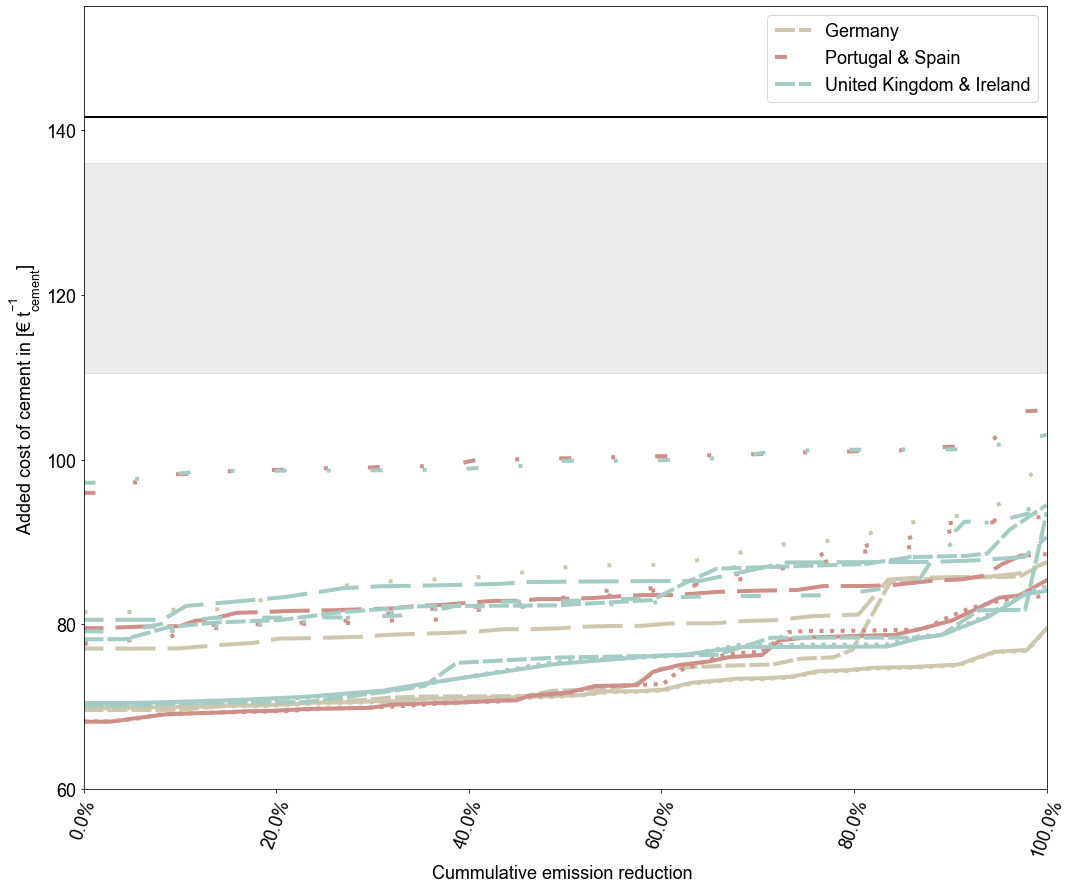

In [30]:
#create figure:
fig, ax = plt.subplots()
scale = 100

#set fontsize
#plt.rcParams.update({'font.size': 14})

df_all_results = pd.DataFrame(columns=[])

#colors
colors = [(255,215,0),
(255,177,78),
(250,135,117),
(234,95,148),
(205,52,181),
(157,2,215),
(0,0,255)]

# colors:
colors = [(141,211,199),
(255,255,179),
(190,186,218),
(251,128,114),
(128,177,211),
(253,180,98),
(179,222,105),
(252,205,229),
(217,217,217),
(188,128,189),
(204,235,197),
(255,237,111),
(253,180,98),
(179,222,105),
(252,205,229),
(217,217,217),
(188,128,189),
(204,235,197),
(255,237,111)]

colors = {
"Germany":(206,199,176),
"United Kingdom & Ireland":(165,204,196),
"Portugal & Spain":(206,142,137)
}


line_style = {
"no_biomass": "dotted",
"no_CCS": (5,(10,3)), #long dash with offset
"no_clay": (0,(1,10)), #loosely dotted
"no_clay_no_biomass": (0,(5,10)), #loosely dashed
"no_clay_no_CCS": (0,(3,10,1,10)), #loosley dash dotted
"no_clay_w_trunklines": (0,(3,5,1,5)),# dashdotted
"w_trunklines": (0,(5,1)), #densly dashed
"w_trunklines_only_1_strg": (0,(5,1)) #densly dashed

}



for i, CaseName in enumerate(CaseNames):
    print(CaseName)

    #find country name: 
    if "GER" in CaseName:
        country_name = "Germany"
    elif "PT" in CaseName: 
        country_name = "Portugal & Spain"
    elif "UK" in CaseName:
        country_name = "United Kingdom & Ireland"

    #determine linestyle:
    style_line = "solid" #default style
    for style in line_style:
        if style in CaseName:
            style_line = line_style[style]
            
    #Determine color
    colors_select = colors[country_name]
    colors_select = make_rgb_range_0_1_from_tuple(colors_select)
    rgb = colors_select

    path  =  f'{generalPath}{runFolder}/{CaseName}'
    #import result form post processing:
    df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{CaseName}_{runName}.csv')
        
    df_all_results [CaseName] = df_grid_filtered_cement['process_tech']
    df_all_results [f"VID{CaseName}"] = df_grid_filtered_cement['OID']
    df_all_results [f"LCOP_total_w_nets_{CaseName}"] = df_grid_filtered_cement['LCOP_total_w_nets'] 

    #add row with 0 cummulative emission reduction (for plotting porpuse only): 
    new_row = pd.DataFrame({'LCOP_total_w_nets': df_grid_filtered_cement.loc[0,"LCOP_total_w_nets"], 'Cummulative_CO2_avoided_w_nets':0}, index=[0])
    df_grid_filtered_cement_plot = pd.concat([new_row,df_grid_filtered_cement.loc[:]]).reset_index(drop=True)

    #add row with 100% cummulative emission redcuton: 
    #new_row = pd.DataFrame({'LCOP_total_w_nets': df_grid_filtered_cement.loc[len(df_grid_filtered_cement),"LCOP_total_w_nets"], 'Cummulative_CO2_avoided_w_nets':100}, index=[0])
    #df_grid_filtered_cement_plot = pd.concat(df_grid_filtered_cement.loc[:],new_row).reset_index(drop=True)


    #plt.fill_between(df_grid_filtered_cement_plot['Cummulative_CO2_avoided_w_nets'],df_grid_filtered_cement_plot['LCOP_total_w_nets'], step="pre",color= rgb, alpha=0.5)
    #Plot graph
    plt.plot (df_grid_filtered_cement_plot['Cummulative_CO2_avoided_w_nets'],df_grid_filtered_cement_plot['LCOP_total_w_nets'],linewidth=4, linestyle=style_line,  label=country_name, color= rgb )


#plot CO2 prices:
for index, row in df_CO2_price.iterrows():
    y = [df_CO2_price.loc[index,"Value"], df_CO2_price.loc[index,"Value"]]
    if index == 0: 
        y_1 = y
    x = [0,1]
    #plt.plot (x,y, linewidth = 2, linestyle = 'solid', color = "black")
plt.fill_between(x,y,y_1, step="pre",color= "black", alpha=0.08)

#plot CO2 prices:
#for index, row in df_CO2_price_CEM_2.iterrows():
#    y = [df_CO2_price_CEM_2.loc[index,"Value"], df_CO2_price_CEM_2.loc[index,"Value"]]
#    if index == 0: 
#        y_1 = y
#    x = [0,1]
    #plt.plot (x,y, linewidth = 2, linestyle = 'solid', color = "black")
#plt.fill_between(x,y,y_1, step="pre",color= "blue", alpha=0.08)

#plot SC-CO2:
y = [185*0.9*0.85, 185*0.9*0.85]
x = [0,1]
plt.plot (x,y, linewidth = 2, linestyle = 'solid', color = "black")

#add labels:
plt.xlabel("Cummulative emission reduction ")
plt.ylabel("Added cost of cement in [$€$ $t^{{-1}}_{cement}$]")

#change x axis format to %:
ax.xaxis.set_major_formatter(formatter)#

#add legend (without multiple ones)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys()) 

# make all text non-italic:
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

#plt.legend()

#set axis limits
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([60, 155])
plt.xticks(rotation=70)

#set figure size:
figure_width = 6 #cm
figure_height = 5 #cm
fig.set_size_inches (figure_width*2.54, figure_height*2.54)
plt.tight_layout()

#save_figure:
plt.savefig(f"{generalPath}/{runFolder}/{CaseName}Plot_MACCS.svg",transparent=True)

#Show figure
plt.show()


In [22]:
CaseName = "UK"
#determine linestyle:
style_line = "solid" #default style

for style in line_style:
    print (style)
    if style in CaseName:
        style_line = line_style[style]
        break
    

no_biomass
no_CCS
no_clay
no_clay_no_biomass
no_clay_no_CCS
no_clay_w_trunklines
w_trunklines
w_trunklines_only_1_strg


SP_PT_max_bio
SP_PT_max_clay
SP_PT_max_energy
SP_PT_max_olivine
SP_PT_min_bio
SP_PT_min_clay
SP_PT_min_energy
SP_PT_min_olivine


IndexError: list index out of range

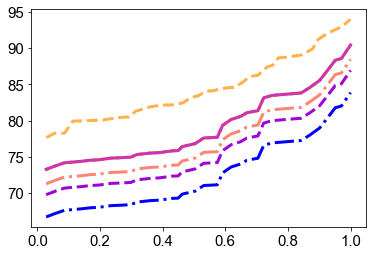

In [125]:
#create figure:
fig, ax = plt.subplots()
scale = 200




#set fontsize
plt.rcParams.update({'font.size': 18})

#define colors:
colors = {"CCS_CEMENT":"tab:red",
"BIOMASS_CEMENT": "tab:blue",
"CCS_BIOMASS_CEMENT": 'tab:orange',
"MINERAL_CEMENT":'tab:green',
"BIOMASS_MINERAL_CEMENT":'tab:cyan',
"CCS_BIOMASS_MINERAL_CEMENT": "black",
"CCS_MINERAL_CEMENT": "grey",
"CALCINED_CLAY_CEMENT": "tab:grey",
"CCS_CALCINED_CLAY_CEMENT": "green",
"CALCINED_CLAY_BIOMASS_CEMENT": "blue"}


#tab:cyan',"brown","grey","black"}
patterns = ['-','--','-.',':','-','--','-.',':']


# colors:
colors = [(141,211,199),
(255,255,179),
(190,186,218),
(251,128,114),
(128,177,211),
(253,180,98),
(179,222,105),
(252,205,229),
(217,217,217),
(188,128,189),
(204,235,197),
(255,237,111)]

#colors
colors = [(255,215,0),
(255,177,78),
(250,135,117),
(234,95,148),
(205,52,181),
(157,2,215),
(0,0,255)]



colors = make_rgb_range_0_1(colors)


color_idx =0
for i, CaseName in enumerate(CaseNames):
    print(CaseName)
    path  =  f'{generalPath}{runFolder}/{CaseName}'
    #import result form post processing:
    df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{CaseName}_{runName}.csv')
    #create random color:
    #rgb = (random.random(), random.random(), random.random())
    rgb = colors[color_idx] 

    #find out selected techs in Case: 
    techs=df_grid_filtered_cement.process_tech.unique()

       
    plt.plot(df_grid_filtered_cement['Cummulative_CO2_avoided_w_nets'],df_grid_filtered_cement['LCOP_total_w_nets'],linestyle = patterns[i], linewidth = 3 ,color = rgb, label = CaseName)

    #Plot graph
    for l,tech in enumerate(techs):
        df_temp = df_grid_filtered_cement[df_grid_filtered_cement['process_tech'] == tech] # here we only filter out cement options
        #plt.scatter(df_temp['Cummulative_CO2_avoided_w_nets'],df_temp['LCOP_total_w_nets'],c=colors[tech],s=scale, label=tech,alpha=0.8, edgecolors='none')
    color_idx+=1

# Add labels
plt.xlabel("Cummulative emission reduction ")
plt.ylabel("Added cost of cement in [$€/t_{cement}$]")

#change x axis format to %:
ax.xaxis.set_major_formatter(formatter)#

#delete double labels and add legend:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


#set axis limits
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([60, 130])
plt.xticks(rotation=70)

#set figure size:
figure_width = 6 #cm
figure_height = 2 #cm
fig.set_size_inches (figure_width*2.54, figure_height*2.54)

#Show figure
plt.show()

UK_no_clay_max_bio
UK_no_clay_max_energy
UK_no_clay_max_olivine
UK_no_clay_min_bio
UK_no_clay_min_energy
UK_no_clay_min_olivine
UK_max_clay


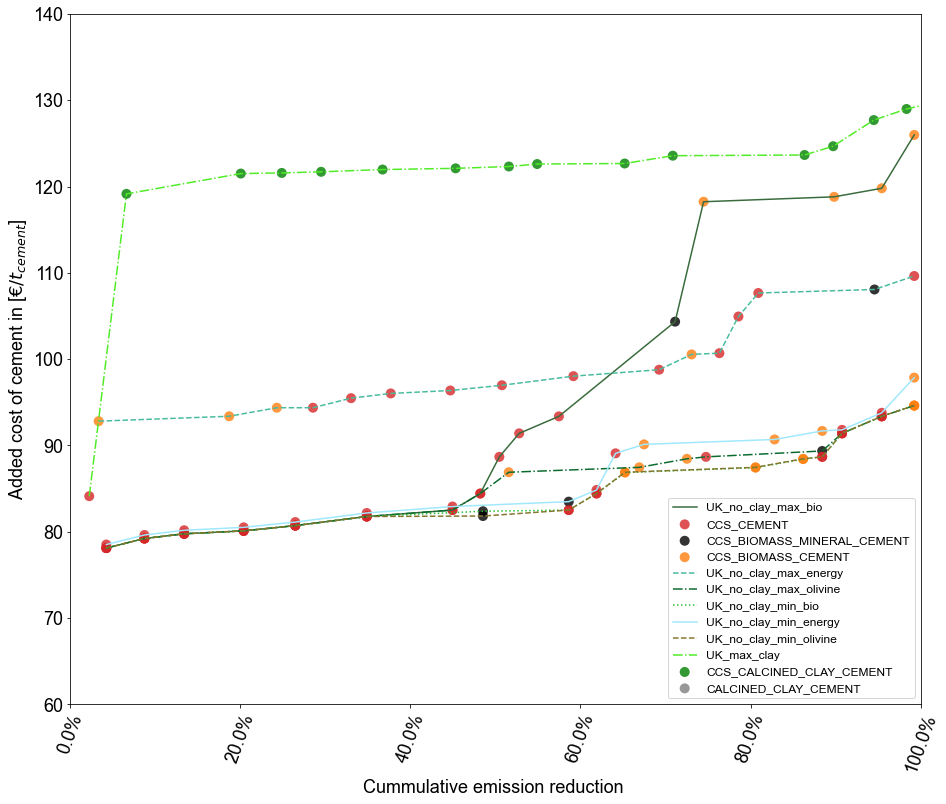

In [ ]:
#create figure:
fig, ax = plt.subplots()
scale = 100


#set fontsize
plt.rcParams.update({'font.size': 12})
#define colors:
colors = {"CCS_CEMENT":"tab:red",
"BIOMASS_CEMENT": "tab:blue",
"CCS_BIOMASS_CEMENT": 'tab:orange',
"MINERAL_CEMENT":'tab:green',
"BIOMASS_MINERAL_CEMENT":'tab:cyan',
"CCS_BIOMASS_MINERAL_CEMENT": "black",
"CCS_MINERAL_CEMENT": "grey",
"CALCINED_CLAY_CEMENT": "tab:grey",
"CCS_CALCINED_CLAY_CEMENT": "green",
"CALCINED_CLAY_BIOMASS_CEMENT": "blue"}


#tab:cyan',"brown","grey","black"}
patterns = ['-','--','-.',':','-','--','-.',':']

for i, CaseName in enumerate(CaseNames):
    print(CaseName)
    path  =  f'{generalPath}{runFolder}/{CaseName}'
    #import result form post processing:
    df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{CaseName}_{runName}.csv')
    #create random color:
    rgb = (random.random(), random.random(), random.random())

    #find out selected techs in Case: 
    techs=df_grid_filtered_cement.process_tech.unique()
    
    plt.plot(df_grid_filtered_cement['Cummulative_CO2_avoided_w_nets'],df_grid_filtered_cement['LCOP_total_w_nets'],linestyle = patterns[i],color = rgb, label = CaseName)

    #Plot graph
    for l,tech in enumerate(techs):
        rgb = (random.random(), random.random(), random.random())
        df_temp = df_grid_filtered_cement[df_grid_filtered_cement['process_tech'] == tech] # here we only filter out cement options
        plt.scatter(df_temp['Cummulative_CO2_avoided_w_nets'],df_temp['LCOP_total_w_nets'],c=colors[tech],s=scale, label=tech,alpha=0.8, edgecolors='none')


# Add labels
plt.xlabel("Cummulative emission reduction ")
plt.ylabel("Added cost of cement in [$€/t_{cement}$]")

#change x axis format to %:
ax.xaxis.set_major_formatter(formatter)#

#delete double labels and add legend:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


#set axis limits
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([60, 140])
plt.xticks(rotation=70)

#set figure size:
figure_width = 6 #cm
figure_height = 5 #cm
fig.set_size_inches (figure_width*2.54, figure_height*2.54)

#Show figure
plt.show()

In [62]:
df_all_results

,grid,GER_max_bio,VID,LCOP_total_w_nets_GER_max_bio,GER_max_clay,VIDGER_max_clay,LCOP_total_w_nets_GER_max_clay,GER_max_energy,VIDGER_max_energy,LCOP_total_w_nets_GER_max_energy,...,LCOP_total_w_nets_GER_min_clay,GER_min_energy,VIDGER_min_energy,LCOP_total_w_nets_GER_min_energy,GER_min_olivine,VIDGER_min_olivine,LCOP_total_w_nets_GER_min_olivine,GER,VIDGER,LCOP_total_w_nets_GER
0,31,CCS_CALCINED_CLAY_CEMENT,CID46,75.000621,CCS_CALCINED_CLAY_CEMENT,CID46,116.839904,CCS_CALCINED_CLAY_CEMENT,CID46,73.018485,...,71.514014,CCS_CALCINED_CLAY_CEMENT,CID46,68.445137,CCS_CALCINED_CLAY_CEMENT,CID46,74.838755,CCS_CALCINED_CLAY_CEMENT,,74.830624
1,30,CCS_CALCINED_CLAY_CEMENT,CID45,78.557065,CCS_CALCINED_CLAY_CEMENT,CID45,120.396348,CCS_CALCINED_CLAY_CEMENT,CID45,76.574929,...,75.070458,CCS_CALCINED_CLAY_CEMENT,CID45,72.001581,CCS_CALCINED_CLAY_CEMENT,CID45,78.654828,CCS_CALCINED_CLAY_CEMENT,,78.655827
2,29,CCS_CALCINED_CLAY_CEMENT,CID43,76.193701,CCS_CALCINED_CLAY_CEMENT,CID43,118.032984,CCS_CALCINED_CLAY_CEMENT,CID43,74.211566,...,72.707094,CCS_CALCINED_CLAY_CEMENT,CID43,69.638218,CCS_CALCINED_CLAY_CEMENT,CID43,76.291464,CCS_CALCINED_CLAY_CEMENT,,76.292464
3,28,CCS_CALCINED_CLAY_CEMENT,CID42,78.732418,CCS_CALCINED_CLAY_CEMENT,CID42,120.571701,CCS_CALCINED_CLAY_CEMENT,CID42,76.750282,...,75.245811,CCS_CALCINED_CLAY_CEMENT,CID42,72.176934,CCS_CALCINED_CLAY_CEMENT,CID42,78.83018,CCS_CALCINED_CLAY_CEMENT,,78.83118
4,27,CCS_CALCINED_CLAY_CEMENT,CID41,80.202403,CCS_CALCINED_CLAY_CEMENT,CID41,122.041686,CCS_CALCINED_CLAY_CEMENT,CID41,78.220268,...,76.715796,CCS_CALCINED_CLAY_CEMENT,CID41,73.64692,CCS_CALCINED_CLAY_CEMENT,CID41,80.300166,CCS_CALCINED_CLAY_CEMENT,,80.301165
5,26,CCS_CALCINED_CLAY_CEMENT,CID40,75.248072,CCS_CALCINED_CLAY_CEMENT,CID40,117.087355,CCS_CALCINED_CLAY_CEMENT,CID40,73.265937,...,71.761465,CCS_CALCINED_CLAY_CEMENT,CID40,68.692588,CCS_CALCINED_CLAY_CEMENT,CID40,75.643796,CCS_CALCINED_CLAY_CEMENT,,75.641994
6,25,CCS_CALCINED_CLAY_CEMENT,CID39,84.600916,CCS_CALCINED_CLAY_CEMENT,CID39,126.440199,CCS_CALCINED_CLAY_CEMENT,CID39,82.618781,...,81.114309,CCS_CALCINED_CLAY_CEMENT,CID39,78.045433,CCS_CALCINED_CLAY_CEMENT,CID39,84.698679,CCS_CALCINED_CLAY_CEMENT,,84.699678
7,24,CCS_CALCINED_CLAY_CEMENT,CID37,75.744427,CCS_CALCINED_CLAY_CEMENT,CID37,117.58371,CCS_CALCINED_CLAY_CEMENT,CID37,73.762292,...,72.25782,CCS_CALCINED_CLAY_CEMENT,CID37,69.188944,CCS_CALCINED_CLAY_CEMENT,CID37,75.114285,CCS_CALCINED_CLAY_CEMENT,,75.114285
8,23,CCS_CALCINED_CLAY_CEMENT,CID35,79.411147,CCS_CALCINED_CLAY_CEMENT,CID35,121.25043,CCS_CALCINED_CLAY_CEMENT,CID35,77.429012,...,75.92454,CCS_CALCINED_CLAY_CEMENT,CID35,72.855664,CCS_CALCINED_CLAY_CEMENT,CID35,79.50891,CCS_CALCINED_CLAY_CEMENT,,79.509909
9,22,CCS_CALCINED_CLAY_CEMENT,CID30,75.762835,CCS_CALCINED_CLAY_CEMENT,CID30,117.602118,CCS_CALCINED_CLAY_CEMENT,CID30,73.780699,...,72.276228,CCS_CALCINED_CLAY_CEMENT,CID30,69.207351,CCS_CALCINED_CLAY_CEMENT,CID30,75.132693,CCS_CALCINED_CLAY_CEMENT,,75.132693


## For Sensitivity analysis

In [13]:
def find_colums_names (column_names_filtered, search_strg_1):
    matches = []
    for names in column_names_filtered:
        #print (names)
        if (search_strg_1) in names:
            matches.append(names)
    if matches ==[]:
        matches = [0]
    return matches

SP_PT_max_bio_no_clay
SP_PT_max_energy_no_clay
SP_PT_max_olivine_no_clay
SP_PT_min_bio_no_clay
SP_PT_min_energy_no_clay
SP_PT_min_olivine_no_clay
SP_PT_no_clay
bio_no_clay
energy_no_clay
olivine_no_clay


C:\Users\bst3191\AppData\Local\Temp\ipykernel_20804\74766349.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


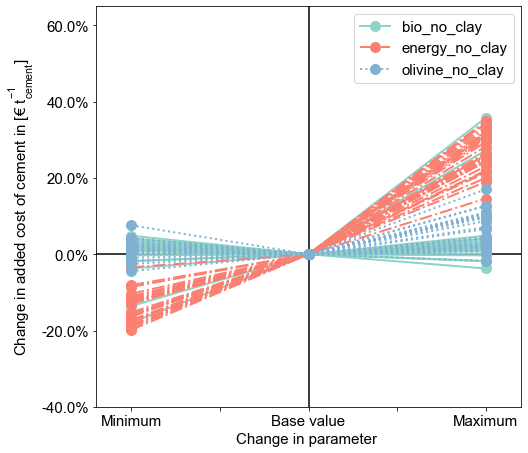

In [29]:
# do this if sensitvity is true:
sensitivity = True

#import Component models for basecase: 
#df_component_models_baseCase = pd.read_excel(f"{generalPath}{runFolder}/COMPONENT_MODELS_BASECASE.xlsx")

#create figure:
fig, ax = plt.subplots()
scale = 100

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

# Add line for x and y axis:
plt.vlines(0, -1, 1,colors= 'k')
plt.hlines(0, -15, 15, colors = 'k')


if sensitivity:
    #load results and match cement plant IDs:
    df_all_results = pd.DataFrame(columns=[])
    for i, CaseName in enumerate(CaseNames):
        print(CaseName)
        path  =  f'{generalPath}{runFolder}/{CaseName}'
        #import result form post processing:
        df_grid_filtered_cement = pd.DataFrame(columns=[])
        df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{CaseName}_{runName}.csv')
        df_grid_filtered_cement.sort_values('grid',inplace=True, ascending=False)
            
        if df_all_results.empty :
            df_all_results["grid"] = df_grid_filtered_cement['grid']
            df_all_results [CaseName] = df_grid_filtered_cement['process_tech']
            df_all_results [f"VID"] = df_grid_filtered_cement['OID']
            df_all_results [f"LCOP_total_w_nets_{CaseName}"] = df_grid_filtered_cement['LCOP_total_w_nets']
            df_all_results.reset_index(drop =True, inplace = True)
        else:
            #since merge() was too unreliable, run through dataframe and find matching numbers
            df_all_results [CaseName] = ""
            df_all_results [f"VID{CaseName}"] = ""
            df_all_results [f"LCOP_total_w_nets_{CaseName}"] = ""

            for index, rows in df_all_results.iterrows():
                VID = df_all_results.loc[index,'VID']
                df_all_results.loc[index,f"LCOP_total_w_nets_{CaseName}"] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'LCOP_total_w_nets')
                df_all_results.loc[index,CaseName] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'process_tech')
                df_all_results.loc[index,f"VID{CaseName}"] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, "OID")
                

    ## import base case data and add to dataframe: 
    path  =  f'{generalPath}{BaserunFolder}/{BaseCaseName}'
    df_grid_filtered_cement = pd.DataFrame(columns=[])
    df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{BaseCaseName}_{runName}.csv')
    
    
    df_all_results [BaseCaseName] = ""
    df_all_results [f"VID{BaseCaseName}"] = ""
    df_all_results [f"LCOP_total_w_nets_{BaseCaseName}"] = ""
    
    for index, rows in df_all_results.iterrows():
        VID = df_all_results.loc[index,'VID']
        df_all_results.loc[index,BaseCaseName] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'process_tech')
        df_all_results.loc[index,f"VID{CaseName}"] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, "OID")
        df_all_results.loc[index,f"LCOP_total_w_nets_{BaseCaseName}"] =find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'LCOP_total_w_nets')

    # derive list of columns with LCOP values: 
    column_names = list(df_all_results.columns)
    column_names_filtered = []
    for names in column_names:
        if ('LCOP_total_w_nets') in names:
            column_names_filtered.append(names)

    # run find sensitivity parameters:
    sensitivity_params =[]
    for names in column_names_filtered:
        if ("max" or "min") in names: 
            param = names.split("max_",1)[1]
            if not param in sensitivity_params:
                sensitivity_params.append(param)


    #### Plot spider plots ############

    # paterns
    #patterns = ['-','--','-.',':','-','--','-.',':']
    # use this when not using clay:
    patterns = ['-','-.',':','-','--','-.',':']


    # colors:
    colors = [(141,211,199),
    #(190,186,218), #comment this out when not using clay
    (251,128,114),
    (128,177,211),
    (253,180,98),
    (179,222,105),
    (252,205,229),
    (217,217,217),
    (188,128,189),
    (204,235,197),  
    (255,237,111)]
#
    colors = make_rgb_range_0_1(colors)
    color_idx =0


    for i,params in enumerate(sensitivity_params):
        print (params)
        for index, columns in df_all_results.iterrows():
            #arbitrary x values:
            x = [-10,0,10]
            #base values:
            y_base =df_all_results.loc[index,f"LCOP_total_w_nets_{BaseCaseName}"]
            #min values
            min_column = find_colums_names(column_names_filtered,f"min_{params}")[0]
            if not min_column == 0:
                y_min = df_all_results.loc[index,min_column]
            else:
                y_min = y_base
            #max values
            max_column = find_colums_names(column_names_filtered,f"max_{params}")[0]
            if not max_column == 0:
                y_max = df_all_results.loc[index,max_column]
            else:
                y_max = y_base
            y = [(y_min/y_base-1), y_base/y_base-1, y_max/y_base-1]

            plt.plot(x,y,linestyle = patterns[i],linewidth = 2 , marker = '.', markersize = 20 ,color = colors[i], label = params)
            
        #plt.scatter(x,y, color = colors[i], label = CaseName)
   
        color_idx+=1
    
    
    #delete double labels and add legend:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # make all text non-italic:
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)

    #change x axis format to %:
    ax.yaxis.set_major_formatter(formatter)#


    # Add labels
    plt.xlabel("Change in parameter ")
    plt.ylabel("Change in added cost of cement in [$€$ $t^{{-1}}_{{cement}}$]")

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[1] = 'Minimum'
    labels[3] = 'Base value'
    labels[5] = 'Maximum'

    ax.set_xticklabels(labels)

    #set axis limits
    ax = plt.gca()
    ax.set_xlim([-12, 12])
    ax.set_ylim([-0.4, 0.65])
    
    plt.gcf().subplots_adjust(bottom=0.15)
    
    #set figure size:
    figure_width = 3 #cm
    figure_height = 3 #cm
    fig.set_size_inches (figure_width*2.54, figure_height*2.54)

plt.savefig(f"{generalPath}/{runFolder}/Sensitivity{CaseName}_plot.svg",transparent=True)


In [43]:
df_all_results.to_csv(f"{generalPath}/{runFolder}/Sensitivity{CaseName}.csv",sep=';', index=False)

In [40]:
df_all_results

,grid,UK_max_bio_no_clay,VID,LCOP_total_w_nets_UK_max_bio_no_clay,UK_max_energy_no_clay,VIDUK_max_energy_no_clay,LCOP_total_w_nets_UK_max_energy_no_clay,UK_max_olivine_no_clay,VIDUK_max_olivine_no_clay,LCOP_total_w_nets_UK_max_olivine_no_clay,...,LCOP_total_w_nets_UK_min_bio_no_clay,UK_min_energy_no_clay,VIDUK_min_energy_no_clay,LCOP_total_w_nets_UK_min_energy_no_clay,UK_min_olivine_no_clay,VIDUK_min_olivine_no_clay,LCOP_total_w_nets_UK_min_olivine_no_clay,UK_no_clay,VIDUK_no_clay,LCOP_total_w_nets_UK_no_clay
0,16,CCS_BIOMASS_CEMENT,CID74,120.391540,CCS_BIOMASS_CEMENT,CID74,102.551839,CCS_BIOMASS_CEMENT,CID74,89.008505,...,63.967247,CCS_BIOMASS_CEMENT,CID74,75.693532,CCS_BIOMASS_CEMENT,CID74,89.008505,CCS_BIOMASS_CEMENT,CID74,87.424505
1,15,CCS_BIOMASS_MINERAL_CEMENT,CID73,105.926560,CCS_BIOMASS_MINERAL_CEMENT,CID73,94.854149,CCS_BIOMASS_MINERAL_CEMENT,CID73,90.916539,...,66.429554,CCS_BIOMASS_MINERAL_CEMENT,CID73,74.561804,CCS_BIOMASS_MINERAL_CEMENT,CID73,83.378593,CCS_BIOMASS_MINERAL_CEMENT,CID73,82.374435
2,14,CCS_BIOMASS_CEMENT,CID72,127.561004,CCS_BIOMASS_CEMENT,CID72,109.721303,CCS_BIOMASS_CEMENT,CID72,96.177968,...,71.136711,CCS_BIOMASS_CEMENT,CID72,82.862996,CCS_BIOMASS_CEMENT,CID72,96.177968,CCS_BIOMASS_CEMENT,CID72,94.593968
3,13,CCS_BIOMASS_CEMENT,CID71,119.822837,CCS_BIOMASS_CEMENT,CID71,101.983136,CCS_BIOMASS_CEMENT,CID71,88.439801,...,63.398544,CCS_BIOMASS_CEMENT,CID71,75.124829,CCS_BIOMASS_CEMENT,CID71,88.439801,CCS_BIOMASS_CEMENT,CID71,86.855801
4,12,CCS_BIOMASS_CEMENT,CID70,121.381585,CCS_BIOMASS_CEMENT,CID70,103.541884,CCS_BIOMASS_CEMENT,CID70,89.998549,...,64.957292,CCS_BIOMASS_CEMENT,CID70,76.683576,CCS_BIOMASS_CEMENT,CID70,89.998549,CCS_BIOMASS_CEMENT,CID70,88.414549
5,11,CCS_CEMENT,CID68,80.797272,CCS_CEMENT,CID68,106.029839,CCS_CEMENT,CID68,80.797272,...,80.797272,CCS_CEMENT,CID68,64.294327,CCS_CEMENT,CID68,80.797272,CCS_CEMENT,CID68,79.213272
6,10,CCS_CEMENT,CID67,90.259939,CCS_CEMENT,CID67,115.492507,CCS_CEMENT,CID67,90.259939,...,90.259939,CCS_CEMENT,CID67,73.756994,CCS_CEMENT,CID67,90.259939,CCS_CEMENT,CID67,88.675939
7,9,CCS_CEMENT,CID63,84.094726,CCS_CEMENT,CID63,109.327294,CCS_CEMENT,CID63,84.094726,...,84.094726,CCS_CEMENT,CID63,67.591781,CCS_CEMENT,CID63,84.094726,CCS_CEMENT,CID63,82.510726
8,8,CCS_CEMENT,CID62,79.691512,CCS_CEMENT,CID62,104.92408,CCS_CEMENT,CID62,79.691512,...,79.691512,CCS_CEMENT,CID62,63.188567,CCS_CEMENT,CID62,79.691512,CCS_CEMENT,CID62,78.107512
9,7,CCS_CEMENT,CID61,82.294497,CCS_CEMENT,CID61,107.527064,CCS_CEMENT,CID61,82.294497,...,82.294497,CCS_CEMENT,CID61,65.791551,CCS_CEMENT,CID61,82.294497,CCS_CEMENT,CID61,80.710497


In [31]:
# do this if sensitvity is true:
sensitivity = False

#import Component models for basecase: 
df_component_models_baseCase = pd.read_excel(f"{generalPath}{runFolder}/COMPONENT_MODELS_BASECASE.xlsx")

#create figure:
fig, ax = plt.subplots()
scale = 100

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# Add line for x and y axis:
plt.vlines(0, -1, 1,colors= 'k')
plt.hlines(0, -15, 15, colors = 'k')


if sensitivity:
    #load results and match cement plant IDs:
    df_all_results = pd.DataFrame(columns=[])
    for i, CaseName in enumerate(CaseNames):
        print(CaseName)
        path  =  f'{generalPath}{runFolder}/{CaseName}'
        #import result form post processing:
        df_grid_filtered_cement = pd.DataFrame(columns=[])
        df_grid_filtered_cement = read_df_from_csv (f'{path}/{typeName}/{runName}/Results_postprocessing/Results_{CaseName}_{runName}.csv')
        df_grid_filtered_cement.sort_values('grid',inplace=True, ascending=False)
            
        if df_all_results.empty :
            df_all_results["grid"] = df_grid_filtered_cement['grid']
            df_all_results [CaseName] = df_grid_filtered_cement['process_tech']
            df_all_results [f"VID"] = df_grid_filtered_cement['OID']
            df_all_results [f"LCOP_total_w_nets_{CaseName}"] = df_grid_filtered_cement['LCOP_total_w_nets']
            df_all_results.reset_index(drop =True, inplace = True)
        else:
            #since merge() was too unreliable, run through dataframe and find matching numbers
            df_all_results [CaseName] = ""
            df_all_results [f"VID{CaseName}"] = ""
            df_all_results [f"LCOP_total_w_nets_{CaseName}"] = ""

            for index, rows in df_all_results.iterrows():
                VID = df_all_results.loc[index,'VID']
                df_all_results.loc[index,f"LCOP_total_w_nets_{CaseName}"] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'LCOP_total_w_nets')
                df_all_results.loc[index,CaseName] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, 'process_tech')
                df_all_results.loc[index,f"VID{CaseName}"] = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement, "OID" ,"OID" ,VID, VID, "OID")
        #calculate baseCase values and calculate change as percentages from it:
        df_all_results [f"Change_{CaseName}"] = ""
        path  =  f"{generalPath}{runFolder}/{CaseName}"
        df_grid_filtered_cement_base = Postprocessing_baseCase.run_postprocessing_BaseCase(path,runName,CaseName,df_component_models_baseCase)
        print(CaseName)
        for index, rows in df_all_results.iterrows():
            VID = df_all_results.loc[index,'VID']
            baseValue_LCOP = find_value_in_dataframe_w_two_cond(df_grid_filtered_cement_base, "OID" ,"OID" ,VID, VID, 'LCOP_total_w_nets')
            df_all_results.loc[index,f"Change_{CaseName}"] = df_all_results.loc[index,f"LCOP_total_w_nets_{CaseName}"]/baseValue_LCOP -1

                

    # derive list of columns with LCOP values: 
    column_names = list(df_all_results.columns)
    column_names_filtered = []
    for names in column_names:
        if ('LCOP_total_w_nets') in names:
            column_names_filtered.append(names)

    # run find sensitivity parameters:
    sensitivity_params =[]
    for names in column_names_filtered:
        if ("max" or "min") in names: 
            param = names.split("max_",1)[1]
            if not param in sensitivity_params:
                sensitivity_params.append(param)


    #### Plot spider plots ############

    # paterns
    patterns = ['-','--','-.',':','-','--','-.',':']

    # colors:
    colors = [(141,211,199),
    (190,186,218),
    (251,128,114),
    (128,177,211),
    (253,180,98),
    (179,222,105),
    (252,205,229),
    (217,217,217),
    (188,128,189),
    (204,235,197),  
    (255,237,111)]
#
    colors = make_rgb_range_0_1(colors)
    color_idx =0


    for i,params in enumerate(sensitivity_params):
        print (params)
        for index, columns in df_all_results.iterrows():
            #arbitrary x values:
            x = [-10,0,10]
            
            #min values
            min_column = find_colums_names(column_names_filtered,f"min_{params}")[0]
            if not min_column == 0:
                y_min = df_all_results.loc[index,min_column]
            else:
                y_min = y_base
            #max values
            max_column = find_colums_names(column_names_filtered,f"max_{params}")[0]
            if not max_column == 0:
                y_max = df_all_results.loc[index,max_column]
            else:
                y_max = y_base
            y = [(y_min/y_base-1), y_base/y_base-1, y_max/y_base-1]

            plt.plot(x,y,linestyle = patterns[i],linewidth = 2 , marker = '.', markersize = 20 ,color = colors[i], label = params)
            
        #plt.scatter(x,y, color = colors[i], label = CaseName)
   
        color_idx+=1
    
    
    #delete double labels and add legend:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # make all text non-italic:
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)
       

    #change x axis format to %:
    ax.yaxis.set_major_formatter(formatter)#


    # Add labels
    plt.xlabel("Change in parameter ")
    plt.ylabel("Change in added cost of cement in [$€/t_{cement}$]")

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[1] = 'Minimum'
    labels[3] = 'Base value'
    labels[5] = 'Maximum'

    ax.set_xticklabels(labels)

    #set axis limits
    ax = plt.gca()
    ax.set_xlim([-12, 12])
    ax.set_ylim([-0.4, 0.65])
    
    
    #set figure size:
    figure_width = 4 #cm
    figure_height = 3 #cm
    fig.set_size_inches (figure_width*2.54, figure_height*2.54)

plt.savefig(f"{generalPath}/Run_02_10_23/Sensitivity{CaseName}_plot.svg",transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bst3191/Documents/My Python projects/IDRIC Model(GitHub)/Casestudy_results/sensitivity_analysis_26_12_23/COMPONENT_MODELS_BASECASE.xlsx'

In [ ]:
df_all_results

,grid,UK_no_clay_max_bio,VID,LCOP_total_w_nets_UK_no_clay_max_bio,Change_UK_no_clay_max_bio,UK_no_clay_max_energy,VIDUK_no_clay_max_energy,LCOP_total_w_nets_UK_no_clay_max_energy,Change_UK_no_clay_max_energy,UK_no_clay_max_olivine,...,LCOP_total_w_nets_UK_no_clay_min_bio,Change_UK_no_clay_min_bio,UK_no_clay_min_energy,VIDUK_no_clay_min_energy,LCOP_total_w_nets_UK_no_clay_min_energy,Change_UK_no_clay_min_energy,UK_no_clay_min_olivine,VIDUK_no_clay_min_olivine,LCOP_total_w_nets_UK_no_clay_min_olivine,Change_UK_no_clay_min_olivine
0,16,CCS_BIOMASS_CEMENT,CID74,89.234965,0.020709,CCS_BIOMASS_CEMENT,CID74,126.795991,0.602022,CCS_BIOMASS_CEMENT,...,85.97642,0.086288,CCS_BIOMASS_CEMENT,CID74,68.477909,-0.134801,CCS_BIOMASS_CEMENT,CID74,87.424662,0.104586
1,15,CCS_BIOMASS_MINERAL_CEMENT,CID73,84.185010,0.02198,CCS_BIOMASS_MINERAL_CEMENT,CID73,119.433841,0.765045,CCS_BIOMASS_MINERAL_CEMENT,...,80.926464,0.195981,CCS_BIOMASS_MINERAL_CEMENT,CID73,66.926345,-0.010921,CCS_BIOMASS_MINERAL_CEMENT,CID73,81.794865,0.208815
2,14,CCS_BIOMASS_CEMENT,CID72,96.404429,0.019139,CCS_BIOMASS_CEMENT,CID72,133.965455,0.546474,CCS_BIOMASS_CEMENT,...,93.145883,0.075266,CCS_BIOMASS_CEMENT,CID72,75.647373,-0.126735,CCS_BIOMASS_CEMENT,CID72,94.594126,0.091984
3,13,CCS_BIOMASS_CEMENT,CID71,88.666262,0.020844,CCS_BIOMASS_CEMENT,CID71,126.227288,0.604541,CCS_BIOMASS_CEMENT,...,85.407716,0.085669,CCS_BIOMASS_CEMENT,CID71,67.909206,-0.136765,CCS_BIOMASS_CEMENT,CID71,86.855959,0.104078
4,12,CCS_BIOMASS_CEMENT,CID70,90.225010,0.020477,CCS_BIOMASS_CEMENT,CID70,127.786036,0.594517,CCS_BIOMASS_CEMENT,...,86.966464,0.085176,CCS_BIOMASS_CEMENT,CID70,69.467954,-0.133172,CCS_BIOMASS_CEMENT,CID70,88.414707,0.103247
5,11,CCS_CEMENT,CID68,79.213429,0.000002,CCS_CEMENT,CID68,128.929212,1.834175,CCS_CEMENT,...,79.213429,0.741376,CCS_CEMENT,CID68,57.445462,0.262843,CCS_CEMENT,CID68,79.213429,0.741376
6,10,CCS_CEMENT,CID67,88.676097,0.000002,CCS_CEMENT,CID67,138.39188,1.518342,CCS_CEMENT,...,88.676097,0.613711,CCS_CEMENT,CID67,66.908129,0.217582,CCS_CEMENT,CID67,88.676097,0.613711
7,9,CCS_CEMENT,CID63,82.510884,0.000002,CCS_CEMENT,CID63,132.226667,1.710209,CCS_CEMENT,...,82.510884,0.691267,CCS_CEMENT,CID63,60.742916,0.245078,CCS_CEMENT,CID63,82.510884,0.691267
8,8,CCS_CEMENT,CID62,78.107670,0.000002,CCS_CEMENT,CID62,127.823453,1.87987,CCS_CEMENT,...,78.10767,0.759847,CCS_CEMENT,CID62,56.339702,0.269392,CCS_CEMENT,CID62,78.10767,0.759847
9,7,CCS_CEMENT,CID61,80.710654,0.000002,CCS_CEMENT,CID61,130.426437,1.775731,CCS_CEMENT,...,80.710654,0.717752,CCS_CEMENT,CID61,58.942686,0.254468,CCS_CEMENT,CID61,80.710654,0.717752


In [ ]:
#Export to csv:
export = True
if export:
    df_all_results.to_csv(f"{generalPath}/Run_02_10_23/Sensitivity{CaseName}.csv",sep=';', index=False)